# Lab 3.02 - The Central Limit Theorem



In [3]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 2.1 - Cholesterol 

A health survey between 1988 and 1994 indicated that the mean cholesterol value for women between the age of 20 and 29 was 183 mg/dl, with a standard deviation equal to 36. We now take a random sample of 81 women.

1. Plot the probability distribution of the sample mean $\overline{x}$.
2. What is the probability of the sample mean being $\overline{x} < 185$? (Answer ≈ 69,1%)
3. What is the probability of $175 < \overline{x} < 185$ (Answer ≈ 66,9%)
4. What is the probability of $\overline{x} > 190$ (Answer ≈ 4,0%)

0.6914624612740131
0.6687123293258339
0.040059156863817086
4.0


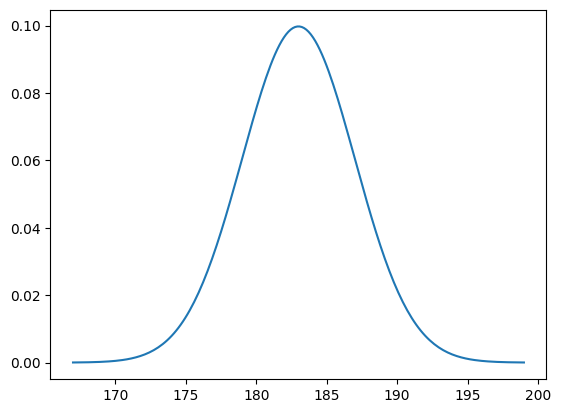

In [4]:
m = 183
n = 81
s = 36 / np.sqrt(n)

print(stats.norm.cdf(185, m, s))
print(stats.norm.cdf(185, m, s) - stats.norm.cdf(175, m, s))
print(stats.norm.sf(190, m, s))
print(s)

x_axis = np.linspace(m - s * 4 , m + s * 4 , 202)
 
x = stats.norm.pdf(x_axis, m, s)
 
plt.plot(x_axis, x)
 
plt.show()



## Exercise 2.2

A random sample of 64 is drawn from a population with unknown distribution. However, the expectation and standard deviation of the population are known: $\mu = 20$ and $\sigma = 16$.

1. Plot the probability distribution of the sample mean.
2. Calculate the z-score for $\overline{x_1} = 15.5$  
3. Calculate the z-score for $\overline{x_2} = 23$ 
4. Determine the probability that 16 < $\overline{x}$ < 22 (Answer ≈ 81.9%)

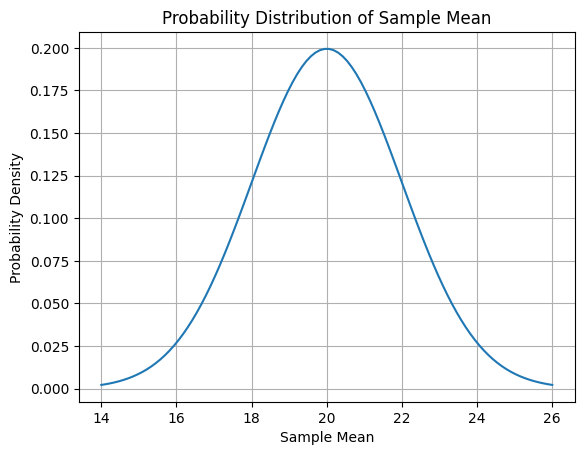

0.022750131948179195 0.8413447460685429 19.41813569208967 20.58186430791033 1.9599639845400545
z-score for x1 = -2.25
z-score for x2 = 1.5
Probability that 16 < x < 22: 81.86 %


In [25]:
import numpy as np
from scipy.stats import norm

# Sample size
n = 64

# Population mean and standard deviation
mu = 20
sigma = 16

# Sample mean standard deviation (standard error)
sigma_x = sigma / np.sqrt(n)

# 1. Plot the probability distribution of the sample mean
# Generate x-axis values for the distribution
x = np.linspace(mu - 3*sigma_x, mu + 3*sigma_x, 100)

# Calculate probability density function (PDF) for the normal distribution
y = norm.pdf(x, loc=mu, scale=sigma_x)

# Import libraries for plotting
import matplotlib.pyplot as plt

# Plot the distribution
plt.plot(x, y)
plt.xlabel("Sample Mean")
plt.ylabel("Probability Density")
plt.title("Probability Distribution of Sample Mean")
plt.grid(True)
plt.show()

z = stats.norm.isf(0.05/2)
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)
# 2. Calculate the z-score for x1 = 15.5
z1 = (15.5 - mu) / sigma_x

# 3. Calculate the z-score for x2 = 23
z2 = (23 - mu) / sigma_x

# 4. Determine the probability that 16 < x < 22 (cumulative area)
# Calculate cumulative distribution function (CDF) for lower and upper bounds


p_lower = norm.cdf(16, loc=mu, scale=sigma_x)
p_upper = norm.cdf(22, loc=mu, scale=sigma_x)

# Probability that 16 < x < 22
probability = p_upper - p_lower
print(p_lower, p_upper, lo, hi, z )
print("z-score for x1 =", z1)
print("z-score for x2 =", z2)
print("Probability that 16 < x < 22:", round(probability * 100, 2), "%")

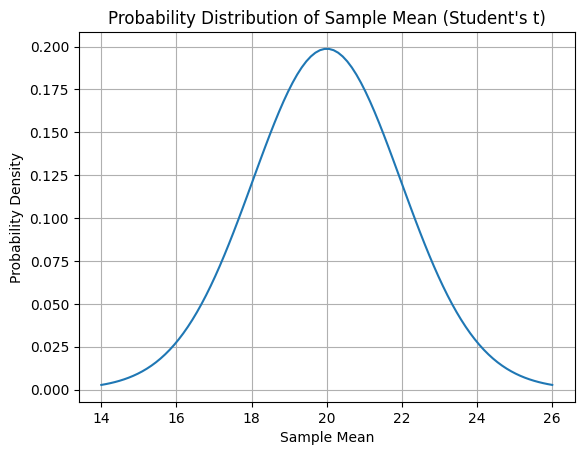

0.024907881849522386 0.8394319842086871 16.00331891495852 23.99668108504148
**Note:** t-distribution doesn't provide z-scores for individual values.
Probability that 16 < x < 22: 81.45 %


In [26]:
import numpy as np
from scipy.stats import t

# Sample size
n = 64

# Population mean and standard deviation
mu = 20
sigma = 16

# Degrees of freedom (n-1 for t-distribution)
df = n - 1

# 1. Plot the probability distribution of the sample mean
# Generate x-axis values for the distribution
x = np.linspace(mu - 3*sigma/np.sqrt(n), mu + 3*sigma/np.sqrt(n), 100)

# Calculate probability density function (PDF) for the t-distribution
y = t.pdf(x, df=df, loc=mu, scale=sigma/np.sqrt(n))

# Import libraries for plotting
import matplotlib.pyplot as plt

# Plot the distribution
plt.plot(x, y)
plt.xlabel("Sample Mean")
plt.ylabel("Probability Density")
plt.title("Probability Distribution of Sample Mean (Student's t)")
plt.grid(True)
plt.show()

# Confidence interval calculations using t-distribution
# Critical value for 95% confidence interval (two-tailed)
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=df)

# Confidence interval bounds
lo = mu - t_crit * (sigma/np.sqrt(n))
hi = mu + t_crit * (sigma/np.sqrt(n))

# 2. Calculate the t-score for x1 = 15.5 (not applicable with t-distribution)
# We can't directly calculate a z-score because we're using the t-distribution. 

# 3. Calculate the t-score for x2 = 23 (not applicable with t-distribution)
# Similar to x1, calculating a z-score isn't suitable here.

# 4. Determine the probability that 16 < x < 22 (cumulative area)
# Calculate cumulative distribution function (CDF) for t-distribution
p_lower = t.cdf(16, df=df, loc=mu, scale=sigma/np.sqrt(n))
p_upper = t.cdf(22, df=df, loc=mu, scale=sigma/np.sqrt(n))

# Probability that 16 < x < 22
probability = p_upper - p_lower
print(p_lower, p_upper, lo, hi)
print("**Note:** t-distribution doesn't provide z-scores for individual values.")
print("Probability that 16 < x < 22:", round(probability * 100, 2), "%")


## Exercise 2.3

When students write in their bachelor thesis proposal that they want to conduct a survey, we usually try to dissuade them from doing so. With what you have learned about sampling and the central limit theorem, can you think of some reasons why we do this?